# Generating audio

In [1]:
# Imports and boilerplate to make graphs look better
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import wave
import random
from IPython.display import Audio

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

## Simple tone generation

Let's start by generating a 440Hz tone.

* For the normal sine wave, `y = sin(2*pi*x)`, the period is 1.
* But for a 1-second 440Hz tone, we want the period to be 1/440, not 1. So we can just multiply the 2*pi constant by 440 to get that. 

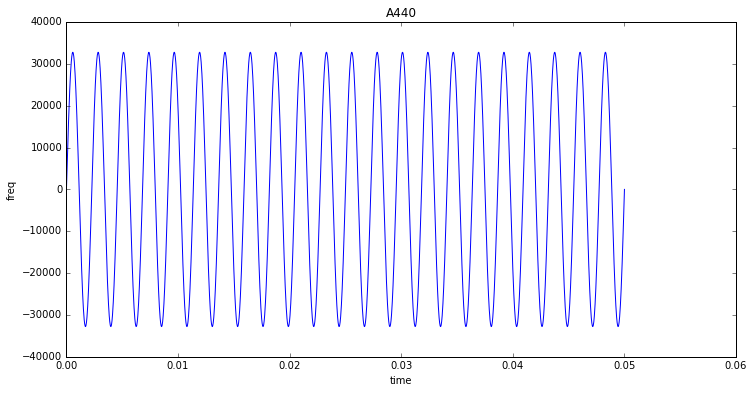

In [2]:
# Let's view 1/20th of a second so we can actually see the wave
samples_per_second = 44100
frequency = 440
num_seconds = 1/20
sample_bitsize = 16
max_amplitude = int(2**sample_bitsize/2 - 1)

x = np.linspace(0, num_seconds, samples_per_second*num_seconds)
y = max_amplitude * np.sin(frequency * 2 * np.pi * x)
setup_graph(title='A440', x_label='time', y_label='freq', fig_size=(12,6))
plt.plot(x, y)

## Now let's generate a wav file

In [3]:
samples_per_second = 44100
frequency = 440
num_seconds = 3

num_channels = 1
sample_bitsize = 16
max_amplitude = int(2**sample_bitsize/2 - 1)
out_file = 'raw_data/a440.wav'

t = np.linspace(0, num_seconds, samples_per_second * num_seconds)
a440 = max_amplitude * np.sin(frequency * 2 * np.pi * t) 

f = wave.open(out_file, 'wb')
f.setparams((num_channels, sample_bitsize // 8, samples_per_second, len(a440), "NONE", "Uncompressed"))
f.writeframes(np.array(a440, dtype=np.int16))
f.close()

### Play it here

In [4]:
Audio(url='./raw_data/a440.wav', autoplay=False)

# Generalize a few functions

In [5]:
MAX_AMP_16BIT = int(2**sample_bitsize/2 - 1)

def generate_wave(freq, len_in_sec=1, samp_rate=44100, amplitude=MAX_AMP_16BIT):
    t = np.linspace(0, len_in_sec, samp_rate * len_in_sec)
    sig = amplitude * np.sin(freq * 2 * np.pi * t) 
    return sig

def write_wav_file(file_path, wav_data, sample_rate=44100, num_channels=1):
    f = wave.open(file_path, 'wb')
    f.setparams((num_channels, 2, sample_rate, len(wav_data), "NONE", "Uncompressed"))
    f.writeframes(np.array(wav_data, dtype=np.int16))
    f.close()

# Generating the C-major scale

A couple important math relationships:
* The frequency of Middle C is: `261.6Hz`
* The ratio between a half-step in the Chromatic scale is `2**(1/12)`
* The major scale follows this step pattern: Whole Whole Half Whole Whole Whole Half

In [6]:
HALF = 2**(1/12)
WHOLE = 2**(2/12)
MAJ_SCAL_MULTIPLIERS = [WHOLE, WHOLE, HALF, WHOLE, WHOLE, WHOLE, HALF]

tone_freq = 261.6  # Hz
c_maj_scale = np.array([], dtype=np.int16)

for mult in [1]+MAJ_SCAL_MULTIPLIERS:
    tone_freq = tone_freq * mult
    print('Note frequency: {}'.format(tone_freq))
    tone_wave = generate_wave(tone_freq)
    #notes.append(tone_wave)
    c_maj_scale = np.append(c_maj_scale, tone_wave)

write_wav_file('./raw_data/c_major_scale.wav', c_maj_scale)

Note frequency: 261.6
Note frequency: 293.636071837732
Note frequency: 329.59534665249885
Note frequency: 349.19410585088104
Note frequency: 391.95713131093993
Note frequency: 439.9570044607435
Note frequency: 493.83504039506215
Note frequency: 523.2000000000002


In [7]:
Audio(url='./raw_data/c_major_scale.wav', autoplay=False)

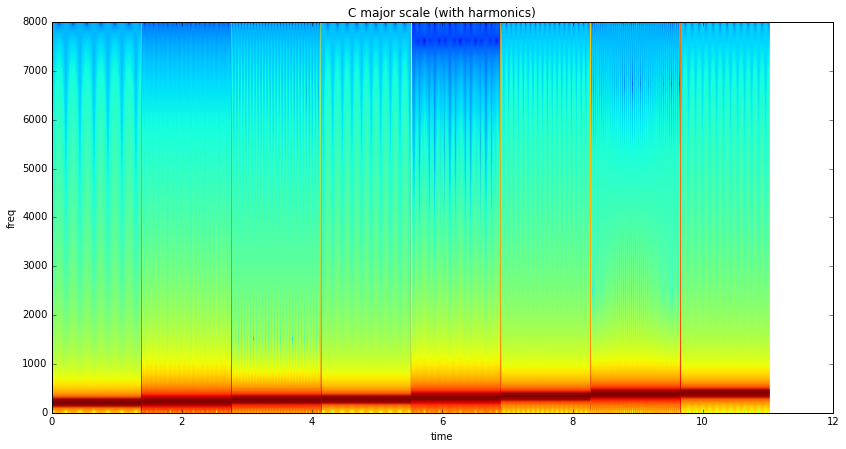

In [8]:
c_maj_scale_downsampled = [c_maj_scale[i] for i in range(0, len(c_maj_scale), 44100//16000)]
setup_graph(title='C major scale (with harmonics)', x_label='time', y_label='freq', fig_size=(14,7))
_ = plt.specgram(c_maj_scale_downsampled, Fs=16000)

# Generate some harmonics

In [9]:
def generate_note_with_harmonics(freq, num_harmonics=16, amplitude_list=(MAX_AMP_16BIT,)*16):
    note = generate_wave(freq)*(1/num_harmonics)
    for index, harmonic in enumerate([i for i in range(1, num_harmonics+1)]):
        harmonic_wave = generate_wave(freq*harmonic, amplitude=amplitude_list[index])
        note = note + harmonic_wave
    return note

In [10]:
tone_freq = 261.6  # Hz
c_maj_scale = np.array([], dtype=np.int16)
amp_list = [MAX_AMP_16BIT*random.random()/(16+4) for i in range(16)]

for mult in [1]+MAJ_SCAL_MULTIPLIERS:
    tone_freq = tone_freq * mult
    print('Note frequency: {}'.format(tone_freq))
    tone_wave = generate_note_with_harmonics(tone_freq, amplitude_list=amp_list)
    c_maj_scale = np.append(c_maj_scale, tone_wave)

write_wav_file('./raw_data/c_major_scale_harmonics.wav', c_maj_scale)

Note frequency: 261.6
Note frequency: 293.636071837732
Note frequency: 329.59534665249885
Note frequency: 349.19410585088104
Note frequency: 391.95713131093993
Note frequency: 439.9570044607435
Note frequency: 493.83504039506215
Note frequency: 523.2000000000002


In [11]:
Audio(url='./raw_data/c_major_scale_harmonics.wav', autoplay=False)

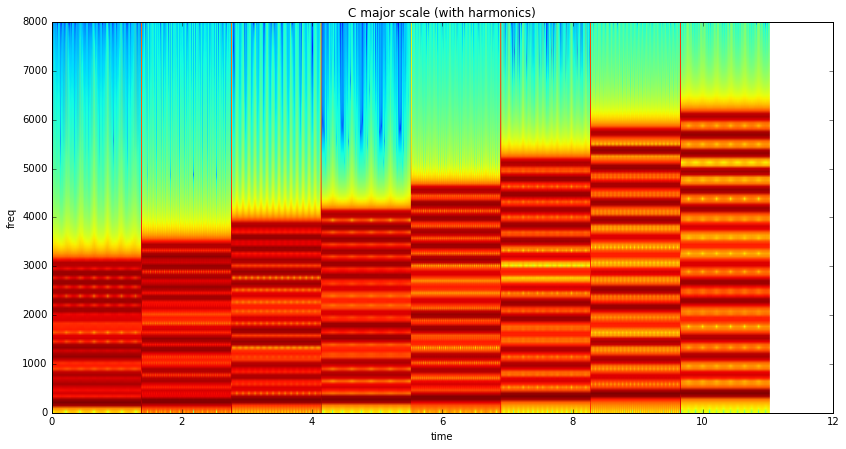

In [12]:
c_maj_scale_downsampled = [c_maj_scale[i] for i in range(0, len(c_maj_scale), 44100//16000)]
setup_graph(title='C major scale (with harmonics)', x_label='time', y_label='freq', fig_size=(14,7))
_ = plt.specgram(c_maj_scale_downsampled, Fs=16000)